## Base de dados used_cars
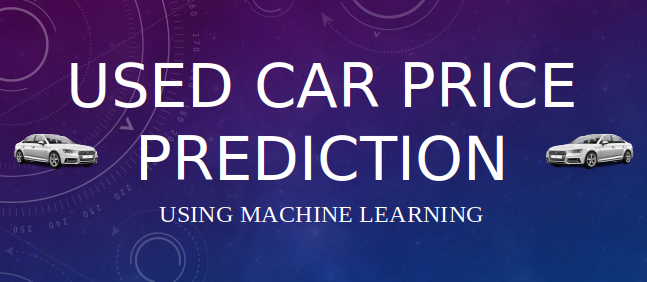

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('autos.csv', encoding = 'ISO--8859-1')

In [3]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


### Explorando os dados fornecidos

Exploração dos dados fornecidos com a função ``info()``:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Os dados da coluna 'name' estão muito variados, por isso iremos apagar esta coluna

In [6]:
df['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                           Golf_3_1.6
1                                 A5_Sportback_2.7_Tdi
2                       Jeep_Grand_Cherokee_"Overland"
3                                   GOLF_4_1_4__3TÜRER
4                       Skoda_Fabia_1.4_TDI_PD_Classic
                              ...                     
371523                      Suche_t4___vito_ab_6_sitze
371524           Smart_smart_leistungssteigerung_100ps
371525              Volkswagen_Multivan_T4_TDI_7DC_UY2
371526                          VW_Golf_Kombi_1_9l_TDI
371527    BMW_M135i_vollausgestattet_NP_52.720____Euro
Name: name, Length: 371528, dtype: object>

A maioria dos veiculos são do tipo particular, então essa coluna está desbalanceada, sendo assim, é irrelevante.

In [7]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

A maioria dos veiculos são do tipo 'Angebot', então essa coluna está desbalanceada, sendo assim, é irrelevante.

In [8]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

#### Transformação 01 - Apagando colunas irrelevantes

In [9]:
df = df.drop('name', axis = 1)
df = df.drop('seller', axis = 1)
df = df.drop('offerType', axis = 1)
# Outras colunas irrelevantes:
df = df.drop('dateCrawled', axis = 1)
df = df.drop('nrOfPictures', axis = 1)
df = df.drop('postalCode', axis = 1)
df = df.drop('dateCreated', axis = 1)
df = df.drop('lastSeen', axis = 1)

In [10]:
# Colunas após apagar as colunas irrelevantes
df.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

#### Transformação 02 - Tratando valores inconsistentes

In [11]:
# Devemos tratar os valores inconsistentes da coluna 'Price', não há sentido houver carros custando menos que 10
i1 = df.loc[df.price < 10]

In [12]:
# Devemos tratar os valores incosistentes maiores que 350k
i2 = df.loc[df.price > 350000]

In [13]:
i1.shape

(12034, 12)

In [14]:
i2.shape

(115, 12)

In [15]:
# Tratamento dos valores inconsistentes
df = df[df.price > 10]
df = df[df.price < 350000]

#### Transformação 03 - Tratando valores faltantes (NaN)

Visualizando os dados faltantes do dataset antes da terceira transformação

In [16]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

price                      0
abtest                     0
vehicleType            33546
yearOfRegistration         0
gearbox                17236
powerPS                    0
model                  17967
kilometer                  0
monthOfRegistration        0
fuelType               29391
brand                      0
notRepairedDamage      65986
dtype: int64



In [17]:
df['vehicleType'].value_counts()

limousine     93614
kleinwagen    78014
kombi         65921
bus           29699
cabrio        22509
coupe         18386
suv           14477
andere         3125
Name: vehicleType, dtype: int64

In [18]:
df['gearbox'].value_counts()

manuell      266547
automatik     75508
Name: gearbox, dtype: int64

O tipo que mais se tem na base de dados é o 'manuell', então iremos setar aqueles que não foram setados como este veiculo.

In [19]:
df['model'].value_counts()

golf               28989
andere             25560
3er                19905
polo               12604
corsa              12149
                   ...  
serie_2                8
rangerover             6
serie_3                3
discovery_sport        1
serie_1                1
Name: model, Length: 251, dtype: int64

O modelo que mais se tem na base de dados é o 'golf', então iremos setar aqueles que não foram setados como este veiculo.

In [20]:
df['fuelType'].value_counts()

benzin     217582
diesel     106002
lpg          5222
cng           557
hybrid        271
andere        165
elektro       101
Name: fuelType, dtype: int64

O combustivel que mais se tem na base de dados é o 'golf', então iremos setar aqueles que não foram setados como este veiculo.

In [21]:
df['notRepairedDamage'].value_counts()

nein    259301
ja       34004
Name: notRepairedDamage, dtype: int64

Oque mais tem nesta coluna na base de dados é o 'nein', então iremos setar aqueles que não foram setados como este veiculo

In [22]:
# Criando um dic para cada mudança dos dados NaN
valores = {'vehicleType': 'limousine', 
           'gearbox': 'manuell', 
           'model': 'golf', 
           'fuelType': 'benzin', 
           'notRepairedDamage': 'nein'}
# Aplicando a mudança
df = df.fillna(value = valores)

In [23]:
# Visualizando os dados faltantes do dataset após a terceira transformação
print("Valores nulos após a transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos após a transformação: 

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64



Observamos que não há mais colunas inconsistentes no nosso DataFrame

### Definindo as features do modelo

In [24]:
# Definição das colunas que serão features (lembrando que a coluna 'PRICE' não está presente)
X = df.iloc[:, 1:13].values
# Definição da variável-alvo
y = df.iloc[:, 0].values

#### Transformação 04 (Parte 1)- Label Enconder
Como a maioria dos algoritmos de aprendizado estatístico supervisionado só aceita valores numéricos como entrada, é necessário então o pré-processamento das variáveis do tipo "object" antes de usar esse dataset como entrada para o treinamento de um modelo.

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_x = LabelEncoder()

In [26]:
# Coluna 'Abtest'
X[:, 0] = le_x.fit_transform(X[:, 0])
# Coluna 'vehicleType'
X[:, 1] = le_x.fit_transform(X[:, 1])
# Coluna 'gearbox'
X[:, 3] = le_x.fit_transform(X[:, 3])
# Coluna 'model'
X[:, 5] = le_x.fit_transform(X[:, 5])
# Coluna 'fuelType'
X[:, 8] = le_x.fit_transform(X[:, 8])
# Coluna 'brand'
X[:, 9] = le_x.fit_transform(X[:, 9])
# Coluna 'notRepairedDamage'
X[:, 10] = le_x.fit_transform(X[:, 10])

#### Transformação 04 (Parte 2) - One Hot Enconder

In [27]:
ohe = OneHotEncoder(categorical_features= [0, 1, 3, 5, 8, 9, 10])

X = ohe.fit_transform(X).toarray()

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


###### Importações
Para isso, utilizaremos a biblioteca ``keras``

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

###### Parâmetros da rede neural artificial:
Link: https://keras.io/

    Sequential - Criação de uma nova rede neural
    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios que fazem parte da camada oculta
    activation - Função de ativação que será inserida
    kernel_initializer - inicialização dos pesos
    input_dim - quantos elementos existem na camada de entrada
    Dropout - é usado para diminuir a chance de overfitting (20% dos neurônios de entrada são zerados)
   
Ponto de partida para o paramêtro ``units`` - número de entradas(316) +  número de saidas(1) / 2 = 158
    
###### Parâmetros do otimizador

    lr - linha de aprendizagem
    decay - Função de decaimento com relação a taxa de aprendizagem (ideal ter valores menores)
    clipvalue - 'clipa' o valor tendo valores máximos/minimos que ao chegar neles congela os valores para sair do padrão
    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)
    metrics - Métrica de avaliação (pode ser colocado mais de um)

In [29]:
def criar_rede():
    regressor = Sequential()
    # Camada de entrada
    regressor.add(Dense(units = 158, activation = 'relu', input_dim = 316))
    # Camada oculta
    regressor.add(Dense(units = 158, activation = 'relu'))
    # Camada de saida
    regressor.add(Dense(units = 1, activation = 'linear'))
    # Compilação
    regressor.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
    return regressor

###### Parâmetros da criação da rede

    build_fn - Função de criação da rede neural
    epochs - quantidade de vezes que será feito o ajuste dos pesos
    batch_size - cálculo de erro a cada 10 registros

###### Parâmetros da validação cruzada

    estimator - Função de criação da rede neural
    X - Atributos previsores
    y - Classe de saída
    cv - Quantidade de vezes do teste (10 divisões na base de dados)
    scoring - retorno dos resultados

In [32]:
regressor = KerasRegressor(build_fn = criar_rede, epochs = 10, batch_size = 300)

resultados = cross_val_score(estimator = regressor, X = X, y = y, cv = 10, scoring = 'neg_mean_absolute_error')

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1078/1078 [==============================] - 5s 5ms/step - loss: 3888.8894 - mean_absolute_error: 3888.8894
Epoch 2/10
1078/1078 [==============================] - 7s 7ms/step - loss: 3358.1335 - mean_absolute_error: 3358.1331
Epoch 3/10
1078/1078 [==============================] - 7s 7ms/step - loss: 3030.8157 - mean_absolute_error: 3030.8157
Epoch 4/10
1078/1078 

1078/1078 [==============================] - 5s 5ms/step - loss: 3916.3950 - mean_absolute_error: 3916.3950
Epoch 2/10
1078/1078 [==============================] - 7s 7ms/step - loss: 3458.7998 - mean_absolute_error: 3458.7998
Epoch 3/10
1078/1078 [==============================] - 6s 5ms/step - loss: 3220.4607 - mean_absolute_error: 3220.4607
Epoch 4/10
1078/1078 [==============================] - 5s 5ms/step - loss: 3003.4980 - mean_absolute_error: 3003.4980
Epoch 5/10
1078/1078 [==============================] - 6s 5ms/step - loss: 2844.8870 - mean_absolute_error: 2844.8870
Epoch 6/10
1078/1078 [==============================] - 6s 5ms/step - loss: 2796.4294 - mean_absolute_error: 2796.4294
Epoch 7/10
1078/1078 [==============================] - 6s 5ms/step - loss: 2739.4958 - mean_absolute_error: 2739.4958
Epoch 8/10
1078/1078 [==============================] - 6s 5ms/step - loss: 2692.2241 - mean_absolute_error: 2692.2241
Epoch 9/10
1078/1078 [==============================] - 6s 

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1078/1078 [==============================] - 5s 5ms/step - loss: 3901.5022 - mean_absolute_error: 3901.5022
Epoch 2/10
1078/1078 [==============================] - 6s 6ms/step - loss: 3416.0168 - mean_absolute_error: 3416.0164
Epoch 3/10
1078/1078 [==============================] - 6s 5ms/step - loss: 3109.3103 - mean_absolute_error: 3109.3103
Epoch 4/10
1078/1078 

In [33]:
resultados

array([-2529.03572695, -2566.26884938, -2550.07861941, -2548.25301668,
       -2862.12990036, -2721.33439379, -2610.09289359, -2701.20940483,
       -2526.30829002, -2498.394079  ])

In [34]:
media = resultados.mean()
media

-2611.310517400968

In [35]:
desvio = resultados.std()
desvio

109.36082308803589

###### Tuning (ajuste) dos paramêtros

O teste abaixo costuma durar muito tempo, realizei diversos testes separados um do outro e obtive o resultado dos seguintes paramêtros:

    epochs = 100
    loss = squared_hinge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def configuraRede(loss):
    regressor = Sequential()
    # Camada de entrada
    regressor.add(Dense(units = 158, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 316))
    # Camada oculta
    regressor.add(Dense(units = 158, activation = 'relu', kernel_initializer = 'random_uniform'))
    # Camada de saída
    regressor.add(Dense(units = 1, activation = 'linear'))
    regressor.compile(loss=loss, optimizer='adam', metrics=['mean_absolute_error'])
    return regressor

In [ ]:
regressor = KerasRegressor(build_fn = configuraRede, epochs = 100, batch_size = 300)
parametros = {'loss': ['mean_squared_error', 'mean_absolute_error',
                       'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
                       'squared_hinge']}

In [ ]:
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parametros,                           
                           cv = 10)
grid_search = grid_search.fit(X, y)

In [ ]:
melhores_parametros = grid_search.best_params_
melhores_parametros